In [1]:
import numpy as np
import pandas as pd

In [2]:
!unzip "/content/drive/MyDrive/archive.zip"
!unzip "/content/drive/MyDrive/berlin-crime.zip"

Archive:  /content/drive/MyDrive/archive.zip
  inflating: immo_data.csv           
Archive:  /content/drive/MyDrive/berlin-crime.zip
  inflating: Berlin_crimes.csv       
Archive:  /content/drive/MyDrive/berlin-env.zip
  inflating: BER_environmental_justice.csv  
  inflating: LOR-Planungsraeume.geojson  


In [2]:
house_df = pd.read_csv("/content/immo_data.csv")
crime_df = pd.read_csv("/content/Berlin_crimes.csv")

In [3]:
berlin_house_df = house_df.loc[house_df['regio1'] == "Berlin"]
berlin_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10406 entries, 45 to 268829
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   regio1                    10406 non-null  object 
 1   serviceCharge             10171 non-null  float64
 2   heatingType               8935 non-null   object 
 3   telekomTvOffer            8994 non-null   object 
 4   telekomHybridUploadSpeed  918 non-null    float64
 5   newlyConst                10406 non-null  bool   
 6   balcony                   10406 non-null  bool   
 7   picturecount              10406 non-null  int64  
 8   pricetrend                10381 non-null  float64
 9   telekomUploadSpeed        8993 non-null   float64
 10  totalRent                 9744 non-null   float64
 11  yearConstructed           8981 non-null   float64
 12  scoutId                   10406 non-null  int64  
 13  noParkSpaces              2013 non-null   float64
 14  firi

In [9]:
crime_df.info() # district

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            1200 non-null   int64 
 1   District        1200 non-null   object
 2   Code            1200 non-null   int64 
 3   Location        1200 non-null   object
 4   Robbery         1200 non-null   int64 
 5   Street_robbery  1200 non-null   int64 
 6   Injury          1200 non-null   int64 
 7   Agg_assault     1200 non-null   int64 
 8   Threat          1200 non-null   int64 
 9   Theft           1200 non-null   int64 
 10  Car             1200 non-null   int64 
 11  From_car        1200 non-null   int64 
 12  Bike            1200 non-null   int64 
 13  Burglary        1200 non-null   int64 
 14  Fire            1200 non-null   int64 
 15  Arson           1200 non-null   int64 
 16  Damage          1200 non-null   int64 
 17  Graffiti        1200 non-null   int64 
 18  Drugs   

In [4]:
berlin_house_df['regio3'] = berlin_house_df['regio3'].apply(lambda x: x.split('_')[1])
berlin_house_df.rename(columns={'regio3':'District'}, inplace=True)
berlin_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10406 entries, 45 to 268829
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   regio1                    10406 non-null  object 
 1   serviceCharge             10171 non-null  float64
 2   heatingType               8935 non-null   object 
 3   telekomTvOffer            8994 non-null   object 
 4   telekomHybridUploadSpeed  918 non-null    float64
 5   newlyConst                10406 non-null  bool   
 6   balcony                   10406 non-null  bool   
 7   picturecount              10406 non-null  int64  
 8   pricetrend                10381 non-null  float64
 9   telekomUploadSpeed        8993 non-null   float64
 10  totalRent                 9744 non-null   float64
 11  yearConstructed           8981 non-null   float64
 12  scoutId                   10406 non-null  int64  
 13  noParkSpaces              2013 non-null   float64
 14  firi

<ipython-input-4-ed3b09cee8e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  berlin_house_df['regio3'] = berlin_house_df['regio3'].apply(lambda x: x.split('_')[1])
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [5]:
simple_berlin_house_df = berlin_house_df[['District','streetPlain','baseRent','livingSpace']]
simple_berlin_house_df['streetPlain'].fillna(simple_berlin_house_df['District'], inplace=True)
simple_berlin_house_df.rename(columns={'streetPlain':'street'}, inplace=True)
simple_berlin_house_df['street'] = simple_berlin_house_df['street'].str.replace("_", " ")
simple_berlin_house_df.to_csv("simple_berlin_house_df.csv", index=False)
simple_berlin_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10406 entries, 45 to 268829
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District     10406 non-null  object 
 1   street       10406 non-null  object 
 2   baseRent     10406 non-null  float64
 3   livingSpace  10406 non-null  float64
dtypes: float64(2), object(2)
memory usage: 406.5+ KB


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
<ipython-input-5-c9549fdfb8e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simple_berlin_house_df['street'] = simple_berlin_house_df['street'].str.replace("_", " ")


In [6]:
crime_df.rename(columns={'Location':'street'}, inplace=True)
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            1200 non-null   int64 
 1   District        1200 non-null   object
 2   Code            1200 non-null   int64 
 3   street          1200 non-null   object
 4   Robbery         1200 non-null   int64 
 5   Street_robbery  1200 non-null   int64 
 6   Injury          1200 non-null   int64 
 7   Agg_assault     1200 non-null   int64 
 8   Threat          1200 non-null   int64 
 9   Theft           1200 non-null   int64 
 10  Car             1200 non-null   int64 
 11  From_car        1200 non-null   int64 
 12  Bike            1200 non-null   int64 
 13  Burglary        1200 non-null   int64 
 14  Fire            1200 non-null   int64 
 15  Arson           1200 non-null   int64 
 16  Damage          1200 non-null   int64 
 17  Graffiti        1200 non-null   int64 
 18  Drugs   

In [71]:
simple_berlin_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10406 entries, 45 to 268829
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District     10406 non-null  object 
 1   baseRent     10406 non-null  float64
 2   livingSpace  10406 non-null  float64
dtypes: float64(2), object(1)
memory usage: 325.2+ KB


In [7]:
berlin_miete_crime = pd.merge(simple_berlin_house_df, crime_df, how='right', on=['District'])
berlin_miete_crime.to_csv("berlin_miete_crime.csv", index=False)

In [8]:
berlin_miete_crime[berlin_miete_crime.isna().any(axis=1)]

,District,street_x,baseRent,livingSpace,Year,Code,street_y,Robbery,Street_robbery,Injury,...,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
8855,Friedrichshain-Kreuzberg,NaN,NaN,NaN,2012,20101,Südliche Friedrichstadt,138,71,723,...,52,500,321,219,46,13,700,102,351,1784
8856,Friedrichshain-Kreuzberg,NaN,NaN,NaN,2012,20202,Tempelhofer Vorstadt,180,88,932,...,90,595,913,390,58,21,915,194,397,2271
8857,Friedrichshain-Kreuzberg,NaN,NaN,NaN,2012,20303,nördliche Luisenstadt,112,70,504,...,24,186,311,115,31,10,456,82,168,1115
8858,Friedrichshain-Kreuzberg,NaN,NaN,NaN,2012,20304,südliche Luisenstadt,109,82,395,...,35,226,347,150,27,11,441,129,423,963
8859,Friedrichshain-Kreuzberg,NaN,NaN,NaN,2012,20405,Karl-Marx-Allee-Nord,58,34,235,...,71,206,185,56,15,5,356,46,23,625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287931,Marzahn-Hellersdorf,NaN,NaN,NaN,2019,100206,Hellersdorf-Süd,17,11,266,...,29,56,57,7,21,7,272,80,45,473
287932,Marzahn-Hellersdorf,NaN,NaN,NaN,2019,100307,Biesdorf,17,9,204,...,48,152,158,76,16,6,187,29,34,396
287933,Marzahn-Hellersdorf,NaN,NaN,NaN,2019,100408,Kaulsdorf,8,4,113,...,24,81,98,40,14,7,137,17,18,225
287934,Marzahn-Hellersdorf,NaN,NaN,NaN,2019,100409,Mahlsdorf,3,3,85,...,38,88,78,85,9,4,191,56,30,197


In [16]:
berlin_miete_crime.dropna(inplace=True)
berlin_miete_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299152 entries, 0 to 299151
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   baseRent        299152 non-null  float64
 1   livingSpace     299152 non-null  float64
 2   Robbery         299152 non-null  int64  
 3   Street_robbery  299152 non-null  int64  
 4   Injury          299152 non-null  int64  
 5   Agg_assault     299152 non-null  int64  
 6   Threat          299152 non-null  int64  
 7   Theft           299152 non-null  int64  
 8   Car             299152 non-null  int64  
 9   From_car        299152 non-null  int64  
 10  Bike            299152 non-null  int64  
 11  Burglary        299152 non-null  int64  
 12  Fire            299152 non-null  int64  
 13  Arson           299152 non-null  int64  
 14  Damage          299152 non-null  int64  
 15  Graffiti        299152 non-null  int64  
 16  Drugs           299152 non-null  int64  
dtypes: float64

In [17]:
berlin_miete_crime = berlin_miete_crime[['baseRent','livingSpace','Robbery', 'Street_robbery', 'Injury', 'Agg_assault', 'Threat', 'Theft', 'Car', 'From_car', 'Bike', 'Burglary', 'Fire', 'Arson', 'Damage', 'Graffiti', 'Drugs']]
berlin_miete_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299152 entries, 0 to 299151
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   baseRent        299152 non-null  float64
 1   livingSpace     299152 non-null  float64
 2   Robbery         299152 non-null  int64  
 3   Street_robbery  299152 non-null  int64  
 4   Injury          299152 non-null  int64  
 5   Agg_assault     299152 non-null  int64  
 6   Threat          299152 non-null  int64  
 7   Theft           299152 non-null  int64  
 8   Car             299152 non-null  int64  
 9   From_car        299152 non-null  int64  
 10  Bike            299152 non-null  int64  
 11  Burglary        299152 non-null  int64  
 12  Fire            299152 non-null  int64  
 13  Arson           299152 non-null  int64  
 14  Damage          299152 non-null  int64  
 15  Graffiti        299152 non-null  int64  
 16  Drugs           299152 non-null  int64  
dtypes: float64

## Train a linear regression to predict house rental prices

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# Preprocess the data
#berlin_miete_crime.fillna(berlin_miete_crime.mean(), inplace=True)
x = berlin_miete_crime[['livingSpace','Robbery', 'Street_robbery', 'Injury', 'Agg_assault', 'Threat', 'Theft', 'Car', 'From_car', 'Bike', 'Burglary', 'Fire', 'Arson', 'Damage', 'Graffiti', 'Drugs']]
y = berlin_miete_crime['baseRent']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
# Train
reg = LinearRegression().fit(x_train, y_train)

In [20]:
# Evaluation
y_pred = reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-Squared:', r2)

Mean Squared Error: 257834.27718732142
R-Squared: 0.721020260402106


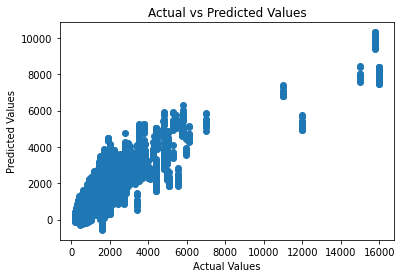

In [21]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

## Train a neural network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

In [ ]:
# Evaluation
y_pred = model.predict(X_test)
mse = np.mean((y_test - y_pred)**2)
print('Mean Squared Error:', mse)

1866/1866 [==============================] - 2s 1ms/step
